In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
from matrix_neural_net import Network
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

class TqdmUpdate(tqdm):
     def update_to(self, b=1, bsize=1, tsize=None):
        """
        b  : int, optional
            Number of blocks transferred so far [default: 1].
        bsize  : int, optional
            Size of each block (in tqdm units) [default: 1].
        tsize  : int, optional
            Total size (in tqdm units). If [default: None] remains unchanged.
        """
        if tsize is not None:
            self.total = tsize
        
        self.update(b * bsize - self.n)  # will also set self.n = b * bsize

In [2]:
# load images and labels of the MNIST data set 
# each element in x_train/x_test is a handwritten digit
# and each element in y_train/y_test is the associated 
# label for that digit (0-9)
if not os.path.exists('./data/mnist/X.npy'):
    import mnist
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    X = np.append(x_train, x_test)
    y = np.append(y_train, y_test)
    np.save('./data/mnist/X', X)
    np.save('./data/mnist/y', y)

X = np.load('./data/mnist/X.npy')
X = X.reshape(70000, 28, 28)
# divide by 255 to normalize values
X = np.array([ (x.flatten())/255 for x in X])

y = np.load('./data/mnist/y.npy')
y = y.reshape(70000, )
y = np.array([int(i) for i in y])

# One hot encode the y data (target variable)
temp = np.zeros((y.size, int(y.max())+1))
temp[np.arange(y.size),y] = 1
y = temp

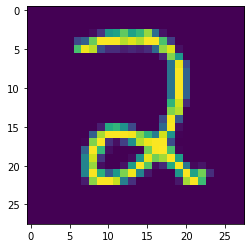

In [3]:
# example of one of the handwritten digits
plt.imshow(X[432].reshape((28,28)))

In [4]:
np.argmax(y[432])

2

In [5]:
# each image is 28x28 pixels, which is flattened
# out into an input array of length 784
len(X[0])

784

In [16]:
# instatiate network with sigmoid activation
# this shape returns an ~80% testing accuracy 
# and takes about 4m30s to train on the MNIST 
# dataset (60,000 images) on an intel pentium, 
# 8Gb memory
network = Network(
    shape=[784, 200, 80, 10], 
    activation = 'sigmoid', output_activation='sigmoid'
)

In [7]:
# verify that the forwad pass works and provides an 
# output with a probability for each label
guess = network.forward_pass(X[0])
guess

array([0.96642771, 0.69700636, 0.8229515 , 0.04989764, 0.14217617,
       0.96098167, 0.55232396, 0.98196917, 0.36432889, 0.82152129])

In [8]:
# the position of the highest probability is taken
# to be the network's output
interpret = lambda x: np.argmax(x)
interpret(guess)

7

In [9]:
# verify that the backwards pass works
network.backward_pass(
    network_input = X[0],
    network_output = guess, 
    expected_output = y[0]
)

In [ ]:
with TqdmUpdate() as t: 
    network.learning_rate = 0.01
    training_accuracy, testing_accuracy = network.train_test(X, y, test_split=0.2, progress=t.update_to)
    print ("Train acc: %.4f - Test acc: %.4f" %(training_accuracy, testing_accuracy))
 

 74%|███████▍  | 41712/56000 [06:25<02:15, 105.19it/s]

In [12]:
with TqdmUpdate() as t: 
    network.learning_rate = 0.5
    training_accuracy, testing_accuracy = network.train_test_minibatch(X, y, test_split=0.2,epochs=30, progress=t.update_to)
    print ("Train acc: %.4f - Test acc: %.4f" %(training_accuracy, testing_accuracy))
 

  7%|▋         | 2/30 [53:06<12:23:30, 1593.23s/it]


KeyboardInterrupt: 

In [ ]:
# Testing accuracy: the percentage of correct guesses in 
# each testing pass
plt.figure()
plt.plot(accuracies)
plt.title("Network Testing Accuracy")
plt.xlabel("Testing Epoch")
plt.ylabel("% of correct labels")
plt.show()

In [ ]:
# POSSIBLE IMPROVEMENTS: 
# 1. Implement Softmax output activation function. I have read that this 
#    performs better with classification problems since it normalizes the 
#    the output vector to have a norm of 1
# 3. Implement some sort of data set augmentation 
# 4. Implement some sort of convolution and pooling layers for faster computation
# 5. Implement adams optimizer for more efficient gradient descent
# 6. Research more on various error functions that can be used to evaluate the model. 